<a href="https://colab.research.google.com/github/poporubeus/Chess_network/blob/main/Cluster_coeff_DEGREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
top100_players = '/content/top_20_data'
path2020 = '/content/Copia di chess_data_2020.csv'


def make_dataframe(path): #questa funzione pulisce il df eliminando le colonne inutili e droppa i NaN
  df = pd.read_csv(path)
  new_df = pd.DataFrame(df, columns=['White', 'Black', 'Result', 'Date', 'Opening'])
  new_df = new_df.dropna()
  return new_df

def make_top100(path):
  df = pd.read_csv(path)
  new_df= pd.DataFrame(df, columns=['Rank', 'Name', 'Rating'])
  new_df = new_df.dropna()
  return new_df

df_top100 = make_top100(top100_players)
df2020 = make_dataframe(path2020)

In [33]:
df_top100

,Rank,Name,Rating
0,1,"Carlsen, Magnus",2872
1,2,"Caruana, Fabiano",2822
2,3,"Ding, Liren",2805
3,4,"Grischuk, Alexander",2777
4,5,"Nepomniachtchi, Ian",2774
...,...,...,...
96,97,"Eljanov, Pavel",2650
97,98,"Oparin, Grigoriy",2650
98,99,"Berkes, Ferenc",2649
99,100,"Lupulescu, Constantin",2649


In [34]:
df_top100[5:]

,Rank,Name,Rating
5,6,"Aronian, Levon",2773
6,7,"Vachier-Lagrave, Maxime",2770
7,8,"Mamedyarov, Shakhriyar",2770
8,9,"Giri, Anish",2768
9,10,"So, Wesley",2765
...,...,...,...
96,97,"Eljanov, Pavel",2650
97,98,"Oparin, Grigoriy",2650
98,99,"Berkes, Ferenc",2649
99,100,"Lupulescu, Constantin",2649


In [35]:
df_top100[5:]

,Rank,Name,Rating
5,6,"Aronian, Levon",2773
6,7,"Vachier-Lagrave, Maxime",2770
7,8,"Mamedyarov, Shakhriyar",2770
8,9,"Giri, Anish",2768
9,10,"So, Wesley",2765
...,...,...,...
96,97,"Eljanov, Pavel",2650
97,98,"Oparin, Grigoriy",2650
98,99,"Berkes, Ferenc",2649
99,100,"Lupulescu, Constantin",2649


# DEVO TOGLIERE TUTTI I NOMI E LASCIARE SOLO LA PRIMA LETTERA

In [38]:
def get_initials(full_name):
    surname, name = full_name.split(', ')
    return f'{surname}, {name[0]}'

# Apply the function to the 'Full_Name' column
df_top100['Name'] = df_top100['Name'].apply(get_initials)

In [39]:
df_top100

,Rank,Name,Rating
0,1,"Carlsen, M",2872
1,2,"Caruana, F",2822
2,3,"Ding, L",2805
3,4,"Grischuk, A",2777
4,5,"Nepomniachtchi, I",2774
...,...,...,...
96,97,"Eljanov, P",2650
97,98,"Oparin, G",2650
98,99,"Berkes, F",2649
99,100,"Lupulescu, C",2649


In [40]:
df_top100[5:]

,Rank,Name,Rating
5,6,"Aronian, L",2773
6,7,"Vachier-Lagrave, M",2770
7,8,"Mamedyarov, S",2770
8,9,"Giri, A",2768
9,10,"So, W",2765
...,...,...,...
96,97,"Eljanov, P",2650
97,98,"Oparin, G",2650
98,99,"Berkes, F",2649
99,100,"Lupulescu, C",2649


# CORREGGIAMO LAGRAVE

In [41]:
df_top100['Name'][6] = 'Vachier Lagrave, M'

<ipython-input-41-ea31590cdf21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top100['Name'][6] = 'Vachier Lagrave, M'


In [43]:
df_top100[5:]

,Rank,Name,Rating
5,6,"Aronian, L",2773
6,7,"Vachier Lagrave, M",2770
7,8,"Mamedyarov, S",2770
8,9,"Giri, A",2768
9,10,"So, W",2765
...,...,...,...
96,97,"Eljanov, P",2650
97,98,"Oparin, G",2650
98,99,"Berkes, F",2649
99,100,"Lupulescu, C",2649


In [44]:
df2020

,White,Black,Result,Date,Opening
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020","C77 Ruy Lopez, Morphy defence"
1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020","C67 Ruy Lopez, Berlin defence, open variation"
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020","D38 Queen's Gambit Declined, Ragozin variation"
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020","D35 Queen's Gambit Declined, 3...Nf6"
4,"Dubov, D","Carlsen, M",½-½,"Dec 29, 2020","E04 Catalan, open, 5.Nf3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


# CONFRONTO SE I TOP 100 SONO TUTTI NEL DF 2020

In [45]:
list_of_players_from_df2020 = list(df2020['White']) + list(df2020['Black'])

In [46]:
len(list_of_players_from_df2020)

37312

In [47]:
list_of_players_from_top100df = list(df_top100['Name'])

In [48]:
list_of_players_from_df2020

['Carlsen, M',
 'Vachier Lagrave, M',
 'Nakamura, H',
 'Nepomniachtchi, I',
 'Dubov, D',
 'So, W',
 'Aronian, L',
 'Radjabov, T',
 'Carlsen, M',
 'Vachier Lagrave, M',
 'Nakamura, H',
 'Nepomniachtchi, I',
 'Dubov, D',
 'So, W',
 'Aronian, L',
 'Radjabov, T',
 'Dubov, D',
 'So, W',
 'Aronian, L',
 'Radjabov, T',
 'Carlsen, M',
 'Vachier Lagrave, M',
 'Nakamura, H',
 'Nepomniachtchi, I',
 'Dubov, D',
 'So, W',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Nepomniachtchi, I',
 'Vachier Lagrave, M',
 'Radjabov, T',
 'So, W',
 'Nepomniachtchi, I',
 'So, W',
 'Nepomniachtchi, I',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Dubov, D',
 'Aronian, L',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Dubov, D',
 'Aronian, L',
 'Dubov, D',
 'Aronian, L',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Aronian, L',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Aronian, L',
 'Dubov, D',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Aronian, L',
 'Dubov, D',
 'Aronian, L',
 'Dubov, D',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Aron

In [49]:
list_of_players_from_top100df in list_of_players_from_df2020

False

In [69]:
list_of_players_from_top100df_only2 = list(df_top100['Name'][:2])

In [70]:
list_of_players_from_top100df_only2

['Carlsen, M', 'Caruana, F']

In [71]:
list_of_players_from_top100df_only2 in list_of_players_from_df2020

False

In [68]:
list_of_players_from_df2020

['Carlsen, M',
 'Vachier Lagrave, M',
 'Nakamura, H',
 'Nepomniachtchi, I',
 'Dubov, D',
 'So, W',
 'Aronian, L',
 'Radjabov, T',
 'Carlsen, M',
 'Vachier Lagrave, M',
 'Nakamura, H',
 'Nepomniachtchi, I',
 'Dubov, D',
 'So, W',
 'Aronian, L',
 'Radjabov, T',
 'Dubov, D',
 'So, W',
 'Aronian, L',
 'Radjabov, T',
 'Carlsen, M',
 'Vachier Lagrave, M',
 'Nakamura, H',
 'Nepomniachtchi, I',
 'Dubov, D',
 'So, W',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Nepomniachtchi, I',
 'Vachier Lagrave, M',
 'Radjabov, T',
 'So, W',
 'Nepomniachtchi, I',
 'So, W',
 'Nepomniachtchi, I',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Dubov, D',
 'Aronian, L',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Dubov, D',
 'Aronian, L',
 'Dubov, D',
 'Aronian, L',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Aronian, L',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Aronian, L',
 'Dubov, D',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Aronian, L',
 'Dubov, D',
 'Aronian, L',
 'Dubov, D',
 'Radjabov, T',
 'Vachier Lagrave, M',
 'Aron

In [88]:
def intersection(ls1,ls2):
  ls3 = [value for value in ls1 if value in ls2]
  return ls3

true_top100 = intersection(list_of_players_from_top100df, list_of_players_from_df2020)

In [89]:
len(true_top100)

91

In [90]:
true_top100

['Carlsen, M',
 'Caruana, F',
 'Ding, L',
 'Grischuk, A',
 'Nepomniachtchi, I',
 'Aronian, L',
 'Vachier Lagrave, M',
 'Mamedyarov, S',
 'Giri, A',
 'So, W',
 'Radjabov, T',
 'Wang, H',
 'Anand, V',
 'Rapport, R',
 'Dominguez Perez, L',
 'Duda, J',
 'Kramnik, V',
 'Karjakin, S',
 'Vitiugov, N',
 'Topalov, V',
 'Nakamura, H',
 'Wei, Y',
 'Artemiev, V',
 'Andreikin, D',
 'Yu, Y',
 'Wojtaszek, R',
 'Firouzja, A',
 'Svidler, P',
 'Vidit, S',
 'Navara, D',
 'Harikrishna, P',
 'Le, Q',
 'Xiong, J',
 'Bu, X',
 'Tomashevsky, E',
 'Alekseenko, K',
 'Vallejo Pons, F',
 'Ivanchuk, V',
 'Matlakov, M',
 'Almasi, Z',
 'Adams, M',
 'Anton Guijarro, D',
 'Sargissian, G',
 'Cheparinov, I',
 'Gelfand, B',
 'Korobov, A',
 'Kryvoruchko, Y',
 'Predke, A',
 'Dubov, D',
 'Shankland, S',
 'Bacrot, E',
 'Howell, D',
 'Jones, G',
 'Areshchenko, A',
 'Shirov, A',
 'McShane, L',
 'Kamsky, G',
 'Ragger, M',
 'Maghsoodloo, P',
 'Sjugirov, S',
 'Amin, B',
 'Grandelius, N',
 'Robson, R',
 'Fedoseev, V',
 'Abasov, N',

In [91]:
list_of_players_from_top100df

['Carlsen, M',
 'Caruana, F',
 'Ding, L',
 'Grischuk, A',
 'Nepomniachtchi, I',
 'Aronian, L',
 'Vachier Lagrave, M',
 'Mamedyarov, S',
 'Giri, A',
 'So, W',
 'Radjabov, T',
 'Wang, H',
 'Anand, V',
 'Rapport, R',
 'Dominguez Perez, L',
 'Duda, J',
 'Kramnik, V',
 'Karjakin, S',
 'Vitiugov, N',
 'Topalov, V',
 'Nakamura, H',
 'Wei, Y',
 'Artemiev, V',
 'Andreikin, D',
 'Yu, Y',
 'Wojtaszek, R',
 'Firouzja, A',
 'Svidler, P',
 'Vidit, S',
 'Navara, D',
 'Harikrishna, P',
 'Le, Q',
 'Xiong, J',
 'Bu, X',
 'Tomashevsky, E',
 'Alekseenko, K',
 'Vallejo Pons, F',
 'Ivanchuk, V',
 'Matlakov, M',
 'Almasi, Z',
 'Adams, M',
 'Anton Guijarro, D',
 'Sadler, M',
 'Sargissian, G',
 'Cheparinov, I',
 'Gelfand, B',
 'Korobov, A',
 'Kryvoruchko, Y',
 'Rausis, I',
 'Predke, A',
 'Jakovenko, D',
 'Dubov, D',
 'Li, C',
 'Shankland, S',
 'Salem, A',
 'Bacrot, E',
 'Howell, D',
 'Jones, G',
 'Areshchenko, A',
 'Shirov, A',
 'McShane, L',
 'Kamsky, G',
 'Ragger, M',
 'Maghsoodloo, P',
 'Sjugirov, S',
 'Ami

In [95]:
elo_list = []
position_list = []
for i in range(len(df_top100['Name'])):
  for j in true_top100:
    if j == df_top100['Name'][i]:
      elo_list.append(df_top100['Rating'][i])
      position_list.append(df_top100['Rank'][i])


In [97]:
len(elo_list)

91

In [98]:
position_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 48,
 50,
 52,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [135]:

data = {
    'Rank': position_list,
    'Name': true_top100,
    'ELO': elo_list
}
top91_players = pd.DataFrame(data, columns=['Rank', 'Name', 'ELO'])

In [136]:
top91_players[5:]

,Rank,Name,ELO
5,6,"Aronian, L",2773
6,7,"Vachier Lagrave, M",2770
7,8,"Mamedyarov, S",2770
8,9,"Giri, A",2768
9,10,"So, W",2765
...,...,...,...
86,96,"Rublevsky, S",2651
87,97,"Eljanov, P",2650
88,98,"Oparin, G",2650
89,99,"Berkes, F",2649


In [107]:
G = nx.from_pandas_edgelist(df2020, 'White', 'Black')

In [108]:
degree = G.degree

In [112]:
degree = dict(degree)
degree

{'Carlsen, M': 36,
 'Dubov, D': 43,
 'Vachier Lagrave, M': 32,
 'So, W': 41,
 'Nakamura, H': 32,
 'Aronian, L': 29,
 'Nepomniachtchi, I': 38,
 'Radjabov, T': 21,
 'Butkiewicz, L': 12,
 'Malicka, M': 21,
 'Ustianovich, N': 6,
 'Ochedzan, T': 20,
 'Redzisz, M': 14,
 'Sanz Wawer, D': 8,
 'Pasti, A': 42,
 'Szpar, M': 25,
 'Fiedorek, M': 6,
 'Kopylov, M': 37,
 'Klepek, W': 16,
 'Goluch, P': 6,
 'Godzwon, I': 25,
 'Szustakowski, A': 12,
 'Sliwicka, A': 40,
 'Chmiel, M': 6,
 'Paszewski, M': 20,
 'Kokoszczynski, J': 18,
 'Wisniewski, M': 6,
 'Kucza, K': 12,
 'Sadzikowski, D': 28,
 'Skawinski, A': 11,
 'Chyzy, J': 25,
 'Vardanyan, A': 15,
 'Suder, J': 12,
 'Konyves, A': 18,
 'Kubicka, A': 26,
 'Golubka, P': 17,
 'Kozak, A': 65,
 'Lisowski, K': 6,
 'Mis, M': 25,
 'Jankowiak, T': 6,
 'Lorscheid, G': 6,
 'Kopylov, D': 14,
 'Kucharska, H': 24,
 'Braeuning, R': 29,
 'Sernecki, F': 24,
 'Golecki, J': 12,
 'Kiolbasa, O': 17,
 'Popiol, M': 11,
 'Luberanski, J': 6,
 'Golda, S': 6,
 'Gumularz, S': 30,
 '

In [126]:
degree_values2 = []
for name in true_top100:
    if name in degree:
        degree_values2.append(degree[name])
    else:
        degree_values2.append(0)


In [127]:
degree_values2

[36,
 27,
 29,
 31,
 38,
 29,
 32,
 22,
 35,
 41,
 21,
 17,
 22,
 4,
 18,
 39,
 9,
 28,
 33,
 9,
 32,
 26,
 46,
 6,
 33,
 16,
 33,
 33,
 27,
 43,
 38,
 34,
 52,
 12,
 4,
 16,
 6,
 21,
 24,
 8,
 21,
 54,
 15,
 22,
 13,
 26,
 9,
 20,
 43,
 25,
 5,
 7,
 13,
 4,
 14,
 8,
 3,
 9,
 24,
 19,
 9,
 33,
 14,
 28,
 12,
 15,
 1,
 5,
 1,
 9,
 2,
 1,
 8,
 21,
 19,
 13,
 23,
 19,
 3,
 43,
 5,
 19,
 44,
 18,
 5,
 28,
 9,
 26,
 6,
 28,
 7]

# SONO SORTED

In [137]:
top91_players['Degree'] = degree_values2

In [138]:
top91_players

,Rank,Name,ELO,Degree
0,1,"Carlsen, M",2872,36
1,2,"Caruana, F",2822,27
2,3,"Ding, L",2805,29
3,4,"Grischuk, A",2777,31
4,5,"Nepomniachtchi, I",2774,38
...,...,...,...,...
86,96,"Rublevsky, S",2651,9
87,97,"Eljanov, P",2650,26
88,98,"Oparin, G",2650,6
89,99,"Berkes, F",2649,28


In [139]:
reversed_df = top91_players.iloc[::-1]
reversed_df

,Rank,Name,ELO,Degree
90,100,"Lupulescu, C",2649,7
89,99,"Berkes, F",2649,28
88,98,"Oparin, G",2650,6
87,97,"Eljanov, P",2650,26
86,96,"Rublevsky, S",2651,9
...,...,...,...,...
4,5,"Nepomniachtchi, I",2774,38
3,4,"Grischuk, A",2777,31
2,3,"Ding, L",2805,29
1,2,"Caruana, F",2822,27


<ipython-input-148-3f20a1ea9b14>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reversed_df['ELO'], reversed_df['Degree'],s=24,alpha=1,edgecolor='black',linewidth=.1,cmap='tab20', color='Blue')


([<matplotlib.axis.XTick at 0x7c2aa6471120>,
 [Text(2649, 0, '2649'),
  Text(2649, 0, '2649'),
  Text(2650, 0, '2650'),
  Text(2650, 0, '2650'),
  Text(2651, 0, '2651'),
  Text(2651, 0, '2651'),
  Text(2652, 0, '2652'),
  Text(2654, 0, '2654'),
  Text(2654, 0, '2654'),
  Text(2655, 0, '2655'),
  Text(2655, 0, '2655'),
  Text(2656, 0, '2656'),
  Text(2658, 0, '2658'),
  Text(2659, 0, '2659'),
  Text(2659, 0, '2659'),
  Text(2659, 0, '2659'),
  Text(2660, 0, '2660'),
  Text(2660, 0, '2660'),
  Text(2661, 0, '2661'),
  Text(2661, 0, '2661'),
  Text(2662, 0, '2662'),
  Text(2663, 0, '2663'),
  Text(2663, 0, '2663'),
  Text(2664, 0, '2664'),
  Text(2666, 0, '2666'),
  Text(2667, 0, '2667'),
  Text(2668, 0, '2668'),
  Text(2671, 0, '2671'),
  Text(2673, 0, '2673'),
  Text(2673, 0, '2673'),
  Text(2673, 0, '2673'),
  Text(2674, 0, '2674'),
  Text(2674, 0, '2674'),
  Text(2674, 0, '2674'),
  Text(2677, 0, '2677'),
  Text(2677, 0, '2677'),
  Text(2677, 0, '2677'),
  Text(2678, 0, '2678'),
  Tex

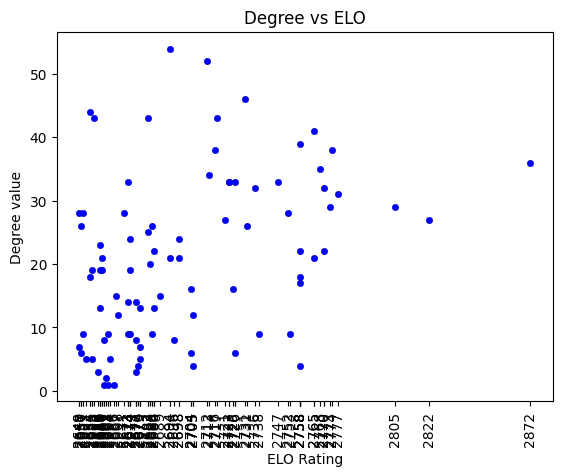

In [148]:
plt.scatter(reversed_df['ELO'], reversed_df['Degree'],s=24,alpha=1,edgecolor='black',linewidth=.1,cmap='tab20', color='Blue')
plt.xlabel('ELO Rating')
plt.ylabel('Degree value')
plt.title('Degree vs ELO')
plt.xticks(reversed_df['ELO'], rotation=90)

([<matplotlib.axis.XTick at 0x7c2aa62af610>,
 [Text(2649, 0, '2649'),
  Text(2649, 0, '2649'),
  Text(2650, 0, '2650'),
  Text(2650, 0, '2650'),
  Text(2651, 0, '2651'),
  Text(2651, 0, '2651'),
  Text(2652, 0, '2652'),
  Text(2654, 0, '2654'),
  Text(2654, 0, '2654'),
  Text(2655, 0, '2655'),
  Text(2655, 0, '2655'),
  Text(2656, 0, '2656'),
  Text(2658, 0, '2658'),
  Text(2659, 0, '2659'),
  Text(2659, 0, '2659'),
  Text(2659, 0, '2659'),
  Text(2660, 0, '2660'),
  Text(2660, 0, '2660'),
  Text(2661, 0, '2661'),
  Text(2661, 0, '2661'),
  Text(2662, 0, '2662'),
  Text(2663, 0, '2663'),
  Text(2663, 0, '2663'),
  Text(2664, 0, '2664'),
  Text(2666, 0, '2666'),
  Text(2667, 0, '2667'),
  Text(2668, 0, '2668'),
  Text(2671, 0, '2671'),
  Text(2673, 0, '2673'),
  Text(2673, 0, '2673'),
  Text(2673, 0, '2673'),
  Text(2674, 0, '2674'),
  Text(2674, 0, '2674'),
  Text(2674, 0, '2674'),
  Text(2677, 0, '2677'),
  Text(2677, 0, '2677'),
  Text(2677, 0, '2677'),
  Text(2678, 0, '2678'),
  Tex

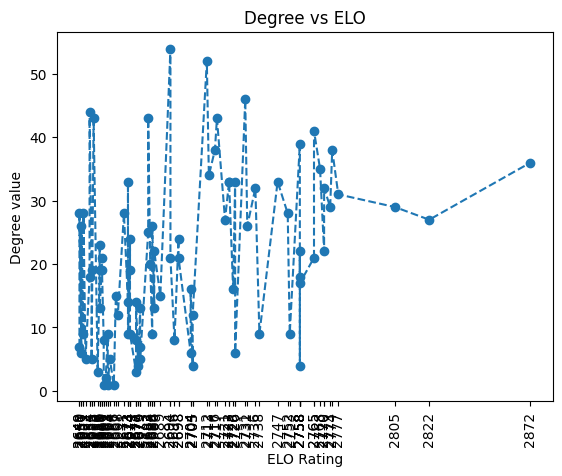

In [150]:
plt.plot(reversed_df['ELO'], reversed_df['Degree'],marker='o', ls='--')
plt.xlabel('ELO Rating')
plt.ylabel('Degree value')
plt.title('Degree vs ELO')
plt.xticks(reversed_df['ELO'], rotation=90)

In [151]:
cluster = nx.clustering(G)

In [152]:
cluster

{'Carlsen, M': 0.526984126984127,
 'Dubov, D': 0.39424141749723146,
 'Vachier Lagrave, M': 0.37298387096774194,
 'So, W': 0.4146341463414634,
 'Nakamura, H': 0.5725806451612904,
 'Aronian, L': 0.5443349753694581,
 'Nepomniachtchi, I': 0.45803698435277385,
 'Radjabov, T': 0.8,
 'Butkiewicz, L': 0.09090909090909091,
 'Malicka, M': 0.23333333333333334,
 'Ustianovich, N': 0.13333333333333333,
 'Ochedzan, T': 0.24210526315789474,
 'Redzisz, M': 0.06593406593406594,
 'Sanz Wawer, D': 0,
 'Pasti, A': 0.1718931475029036,
 'Szpar, M': 0.14,
 'Fiedorek, M': 0.13333333333333333,
 'Kopylov, M': 0.3258258258258258,
 'Klepek, W': 0.041666666666666664,
 'Goluch, P': 0,
 'Godzwon, I': 0.05,
 'Szustakowski, A': 0.10606060606060606,
 'Sliwicka, A': 0.1358974358974359,
 'Chmiel, M': 0.06666666666666667,
 'Paszewski, M': 0.23157894736842105,
 'Kokoszczynski, J': 0.0718954248366013,
 'Wisniewski, M': 0,
 'Kucza, K': 0.12121212121212122,
 'Sadzikowski, D': 0.10582010582010581,
 'Skawinski, A': 0.16363636363

In [153]:
cluster_values = []
for name in true_top100:
    if name in cluster:
        cluster_values.append(cluster[name])
    else:
        cluster_values.append(0)

In [162]:
cluster['Caruana, F']

0.5498575498575499

In [161]:
top91_players['Cluster_coeff'] = cluster_values
top91_players

,Rank,Name,ELO,Degree,Cluster_coeff
0,1,"Carlsen, M",2872,36,0.526984
1,2,"Caruana, F",2822,27,0.549858
2,3,"Ding, L",2805,29,0.544335
3,4,"Grischuk, A",2777,31,0.524731
4,5,"Nepomniachtchi, I",2774,38,0.458037
...,...,...,...,...,...
86,96,"Rublevsky, S",2651,9,0.277778
87,97,"Eljanov, P",2650,26,0.258462
88,98,"Oparin, G",2650,6,0.133333
89,99,"Berkes, F",2649,28,0.219577


In [163]:
reversed_df = top91_players.iloc[::-1]
reversed_df

,Rank,Name,ELO,Degree,Cluster_coeff
90,100,"Lupulescu, C",2649,7,0.000000
89,99,"Berkes, F",2649,28,0.219577
88,98,"Oparin, G",2650,6,0.133333
87,97,"Eljanov, P",2650,26,0.258462
86,96,"Rublevsky, S",2651,9,0.277778
...,...,...,...,...,...
4,5,"Nepomniachtchi, I",2774,38,0.458037
3,4,"Grischuk, A",2777,31,0.524731
2,3,"Ding, L",2805,29,0.544335
1,2,"Caruana, F",2822,27,0.549858


([<matplotlib.axis.XTick at 0x7c2aa4969b40>,
 [Text(2649, 0, '2649'),
  Text(2649, 0, '2649'),
  Text(2650, 0, '2650'),
  Text(2650, 0, '2650'),
  Text(2651, 0, '2651'),
  Text(2651, 0, '2651'),
  Text(2652, 0, '2652'),
  Text(2654, 0, '2654'),
  Text(2654, 0, '2654'),
  Text(2655, 0, '2655'),
  Text(2655, 0, '2655'),
  Text(2656, 0, '2656'),
  Text(2658, 0, '2658'),
  Text(2659, 0, '2659'),
  Text(2659, 0, '2659'),
  Text(2659, 0, '2659'),
  Text(2660, 0, '2660'),
  Text(2660, 0, '2660'),
  Text(2661, 0, '2661'),
  Text(2661, 0, '2661'),
  Text(2662, 0, '2662'),
  Text(2663, 0, '2663'),
  Text(2663, 0, '2663'),
  Text(2664, 0, '2664'),
  Text(2666, 0, '2666'),
  Text(2667, 0, '2667'),
  Text(2668, 0, '2668'),
  Text(2671, 0, '2671'),
  Text(2673, 0, '2673'),
  Text(2673, 0, '2673'),
  Text(2673, 0, '2673'),
  Text(2674, 0, '2674'),
  Text(2674, 0, '2674'),
  Text(2674, 0, '2674'),
  Text(2677, 0, '2677'),
  Text(2677, 0, '2677'),
  Text(2677, 0, '2677'),
  Text(2678, 0, '2678'),
  Tex

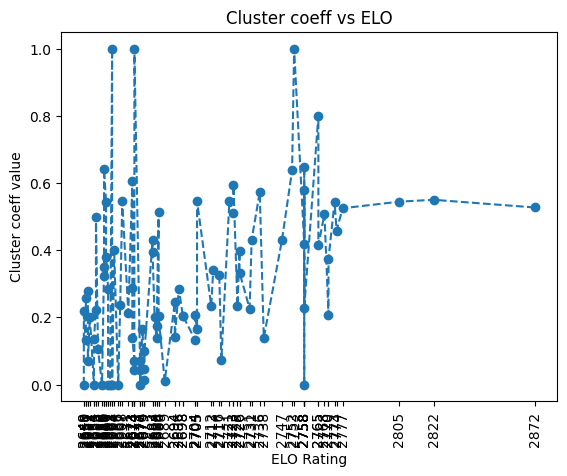

In [164]:
plt.plot(reversed_df['ELO'], reversed_df['Cluster_coeff'],marker='o', ls='--')
plt.xlabel('ELO Rating')
plt.ylabel('Cluster coeff value')
plt.title('Cluster coeff vs ELO')
plt.xticks(reversed_df['ELO'], rotation=90)

In [184]:
betwenness = nx.betweenness_centrality(G)

In [186]:
betwenness

{'Carlsen, M': 0.0005571469071682463,
 'Dubov, D': 0.001953474351909318,
 'Vachier Lagrave, M': 0.004174478259081431,
 'So, W': 0.0029385253620955298,
 'Nakamura, H': 0.0005500314485756696,
 'Aronian, L': 0.001130883194439206,
 'Nepomniachtchi, I': 0.0011070833841963104,
 'Radjabov, T': 0.0002743505016425027,
 'Butkiewicz, L': 0.0003145507739685504,
 'Malicka, M': 0.0015445343298088553,
 'Ustianovich, N': 4.797918722866573e-05,
 'Ochedzan, T': 0.0021329432348641355,
 'Redzisz, M': 0.0018837654587133558,
 'Sanz Wawer, D': 0.00029513122470265553,
 'Pasti, A': 0.011825207879954254,
 'Szpar, M': 0.004396970397440503,
 'Fiedorek, M': 8.87999453030226e-05,
 'Kopylov, M': 0.004958598896929548,
 'Klepek, W': 0.0013831637462537287,
 'Goluch, P': 4.318454727408988e-05,
 'Godzwon, I': 0.004686209697187028,
 'Szustakowski, A': 0.0007565575835095244,
 'Sliwicka, A': 0.013994523616845542,
 'Chmiel, M': 0.00021124036923755122,
 'Paszewski, M': 0.002518634913221663,
 'Kokoszczynski, J': 0.003403004773

In [195]:
betw_values = []
for name in true_top100:
    if name in betwenness:
       betw_values.append(betwenness[name])
    else:
        betw_values.append(0)

In [196]:
top91_players['Betweenness'] = betw_values
top91_players

,Rank,Name,ELO,Degree,Cluster_coeff,Betweenness
0,1,"Carlsen, M",2872,36,0.526984,0
1,2,"Caruana, F",2822,27,0.549858,0
2,3,"Ding, L",2805,29,0.544335,0
3,4,"Grischuk, A",2777,31,0.524731,0
4,5,"Nepomniachtchi, I",2774,38,0.458037,0
...,...,...,...,...,...,...
86,96,"Rublevsky, S",2651,9,0.277778,0
87,97,"Eljanov, P",2650,26,0.258462,0
88,98,"Oparin, G",2650,6,0.133333,0
89,99,"Berkes, F",2649,28,0.219577,0
